- Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.



- Exercici 2
Compara’ls en base al MSE i al R2.



- Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.



- Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).



- Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.



In [174]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Cargamos datos
df = pd.read_csv('housing data.csv', sep = ',', encoding = 'latin', names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [175]:
# creamos dataset
X,y = df.iloc[:,:-1], df.iloc[:,-1:]

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)

y_train=y_train.astype(int)    # pasamos a integer valor Target

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(404, 13) (102, 13) (404, 1) (102, 1)


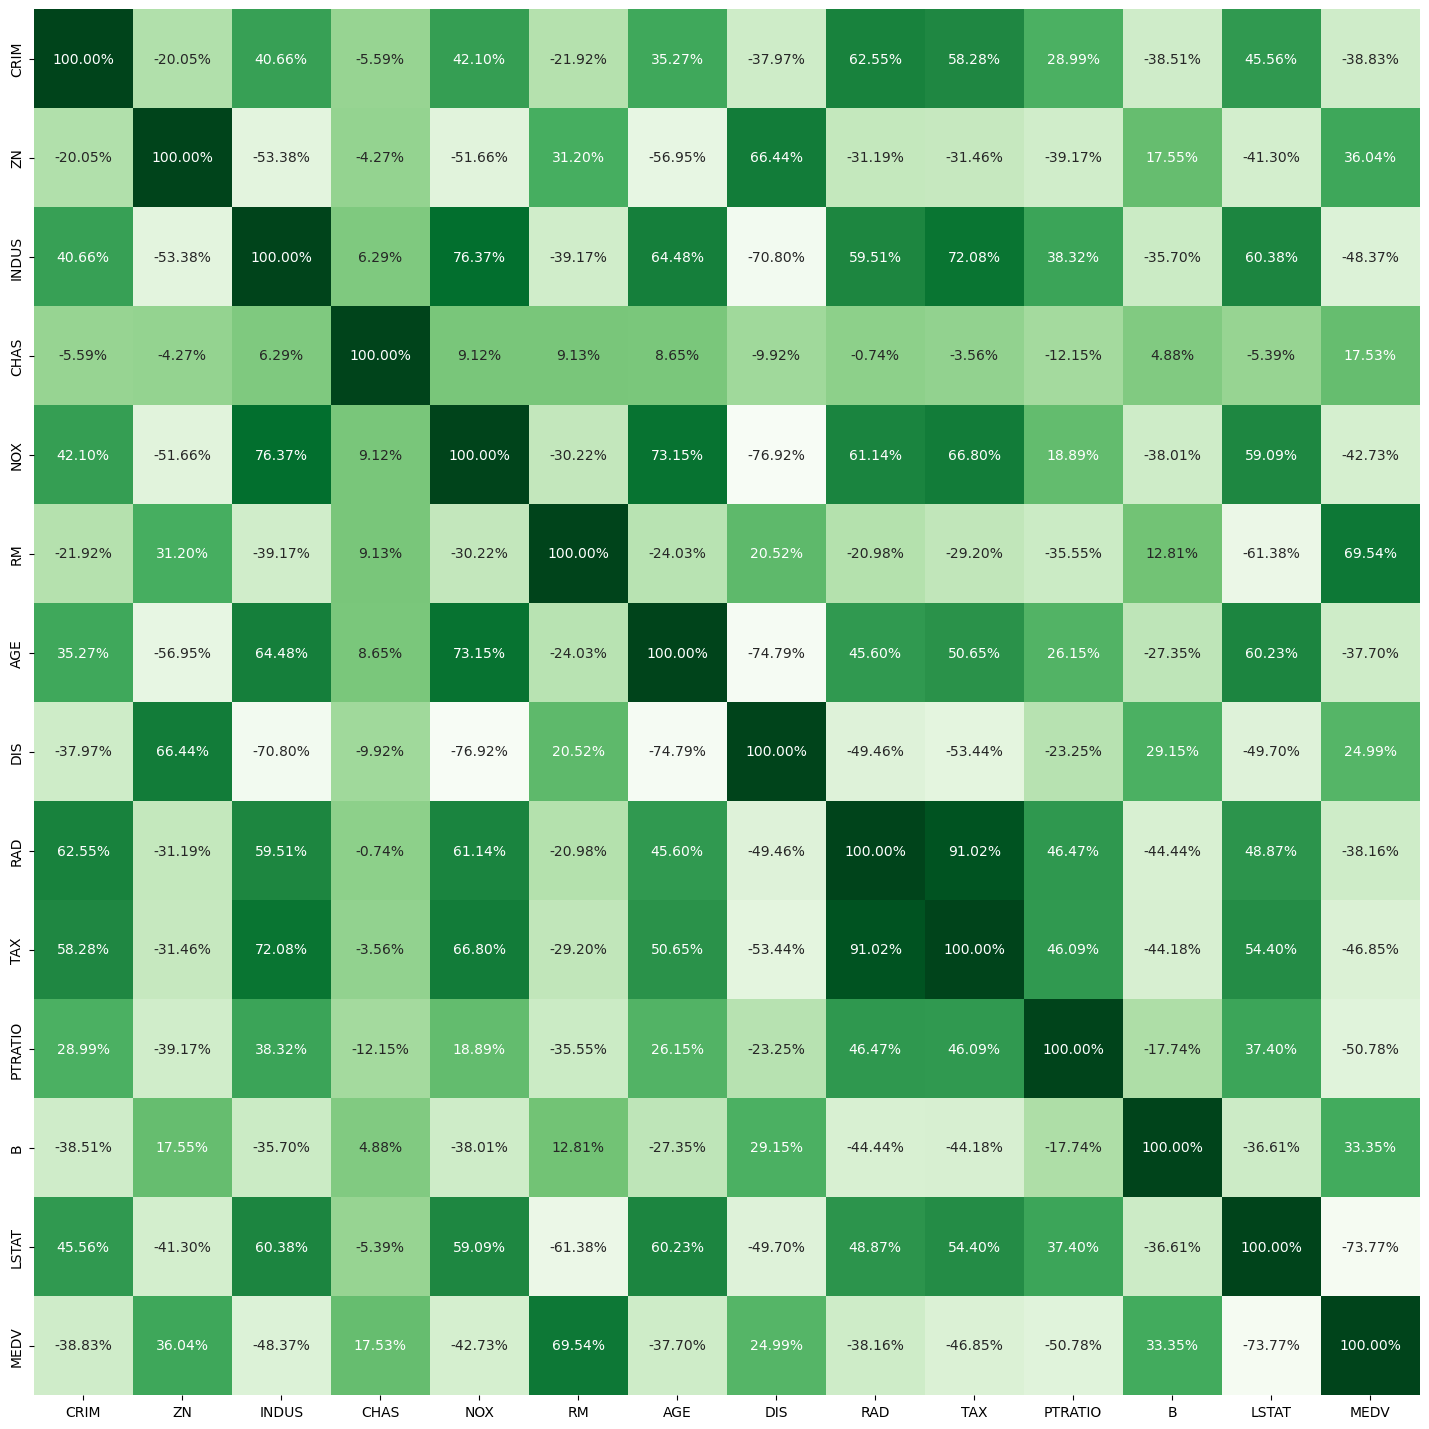

In [176]:
corr = df.corr()

plt.figure(figsize=(18,18))


heatmap =sns.heatmap(corr, cbar = False, square= True, fmt='.2%', annot=True, cmap='Greens')

# Vemos correlaciones altas con la Variable Target ( MEDV ) para : LSTAT(-0.737663), RM(0.695360), PTRATIO (-0.507787)

# Creamos minidataset con estas features ...



In [177]:

Houses_X_train =X_train.iloc[:,[12,10,5]] # nuevo dataset con columnas high correlated : LSTAT(col. 12), RM(col. 5) y PTRATIO (col.10)
Houses_y_train = y_train

Houses_X_test = X_test.iloc[:,[12,10,5]] # LSTAT(col. 12), RM(col. 5) y PTRATIO (col.10)
Houses_y_test = y_test


# Vemos que forma tiene esta dataset y decidimos que procesos de estandarización aplicamos  : Standard, Robust ( Outliers), MinMax ( No Outliers)

Houses_X_train.describe()



,LSTAT,PTRATIO,RM
count,404.000000,404.000000,404.000000
mean,12.778540,18.438614,6.268792
std,7.216403,2.169469,0.689229
min,1.730000,12.600000,3.561000
25%,7.092500,17.225000,5.876750
50%,11.465000,19.000000,6.179000
75%,17.102500,20.200000,6.626500
max,37.970000,22.000000,8.780000


## Aparentemente  vemos que la STD para LSTAT destaca. Min y Max para LSTAT también son extremos así que presuponemos mas outliers en LSTAT




In [178]:
# Seguimos buscando outliers, queremnos hacer pairplots..añadimos Target ( as type int) al Dataframe Houses_X_train/test

y_train =  y_train.astype(int)

Houses_X_trainy = np.hstack([Houses_X_train,y_train]) # Hstack para concat X_train e y_train

Houses_X_trainy = pd.DataFrame(Houses_X_trainy, columns = ['LSTAT','PTRATIO','RM','PRICE']) # pasamos a DF el nuevo DF--trainy
Houses_X_trainy.head(2)

,LSTAT,PTRATIO,RM,PRICE
0,5.81,17.9,6.169,25.0
1,6.86,19.7,6.145,23.0


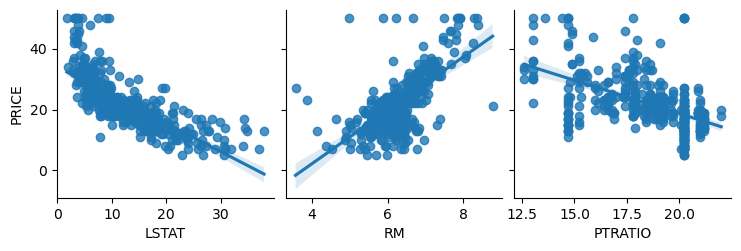

In [179]:

sns.pairplot(
    Houses_X_trainy,
    x_vars=["LSTAT", "RM", "PTRATIO"],
    y_vars=["PRICE"], kind = 'reg'
)


## Esperabamos más outliers en LSTAT, así que la lógica de presuponer más ouliers para Std más altas no és del todo  válida. 

In [180]:
# Vemos que `para LSTAT RM Y PTRATIO existen Outliers así que vamos a comparar Scores para StandarScaler y RobustScaler.
# Esperamos mejores resultados para Robust

scaler = StandardScaler()

Scaled_XtrainS = StandardScaler().fit_transform(Houses_X_train)
Scaled_XtestS  = StandardScaler().fit_transform(Houses_X_test)
Scaled_ytrainS = StandardScaler().fit_transform(Houses_y_train)
Scaled_ytestS = StandardScaler().fit_transform(Houses_y_test)



robust = RobustScaler()

Scaled_XtrainR = RobustScaler().fit_transform(Houses_X_train)
Scaled_XtestR  = RobustScaler().fit_transform(Houses_X_test)
Scaled_ytrainR = RobustScaler().fit_transform(Houses_y_train)
Scaled_ytestR = RobustScaler().fit_transform(Houses_y_test)




In [181]:
#  1 feature y StandarScaler : PTRATIO
scaled_XtrainS = Scaled_XtrainS[:,1].reshape(-1,1) # para PTRATIO feature y para StandardScaler
scaled_XtestS = Scaled_XtestS[:,1].reshape(-1,1) # para PTRATIO feature y para StandardScaler


#  1 feature y Robust Scaler : PTRATIO

scaled_XtrainR = Scaled_XtrainR[:,1].reshape(-1,1) # para PTRATIO feature y para Robust Scaler
scaled_XtestR = Scaled_XtestR[:,1].reshape(-1,1) # para PTRATIO feature y para Robust Scaler


In [182]:
scaled_XtrainS.shape

(404, 1)

In [183]:
# Create linear regression object for 1 feature : PTRATIO y StandarScaler ( en teoría NO es el mejor pues existen outliers)


regr = linear_model.LinearRegression()

regr.fit(scaled_XtrainS, Scaled_ytrainS) # Standard Scaler y PTRATIO

#Predict

Houses_y_pred = regr.predict(scaled_XtestS)




a = mean_squared_error(Scaled_ytestS, Houses_y_pred)
b = r2_score(Scaled_ytestS, Houses_y_pred)

#Intercept
print("Intercept:", regr.intercept_)
#Coef
print("Coefficients: \n", regr.coef_)
# The mean squared error 1 feature : PTRATIO y StandarScaler
print("Mean squared error: %.2f" % a)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % b)



Intercept: [3.04784902e-16]
Coefficients: 
 [[-0.52423698]]
Mean squared error: 0.80
Coefficient of determination: 0.20


In [184]:
# Create linear regression object for 1 feature : PTRATIO y RobustScaler( en teoría SI es el mejor pues existen outliers)


regr = linear_model.LinearRegression()

#Train the model using the training set

regr.fit(scaled_XtrainR, Scaled_ytrainR)

#Predict

Houses_y_pred1 = regr.predict(scaled_XtestR)



c = mean_squared_error(Scaled_ytestR, Houses_y_pred1)
d = r2_score(Scaled_ytestR, Houses_y_pred1)


print("Intercept:", regr.intercept_)

print("Coefficients: \n", regr.coef_)
# The mean squared error PTRATIO Robust
print("Mean squared error: %.2f" % c)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % d)



Intercept: [-0.01399458]
Coefficients: 
 [[-0.81200984]]
Mean squared error: 1.30
Coefficient of determination: 0.19




# Resultados pobres ( R2 = 0.37 y 0.33 )......Además Robust da peores resultados. 

# 
Vamos a probar con una regresión Lineal múltiple para las tres variables:



In [185]:
Scaled_XtrainS2 = Scaled_XtrainS.copy() # para PTRATIO, LSTAT y RM  features y Standard Scaler 
Scaled_XtestS2 = Scaled_XtestS.copy()# para PTRATIO, LSTAT y RM  features y Standard Scaler 


# Idem para RobustScaler 

Scaled_XtrainR2 = Scaled_XtrainR.copy() # para PTRATIO, LSTAT y RM  features y Standard Scaler 
Scaled_XtestR2 = Scaled_XtestR.copy()# para PTRATIO, LSTAT y RM  features y Standard Scaler 


In [186]:
# Create linear regression object for 3 features : PTRATIO, LSTAT y RM  y Standard _Scaler

regr = linear_model.LinearRegression()
regr.fit(Scaled_XtrainS2, Scaled_ytrainS)

# Make predictions using the testing set

Houses_y_pred2 = regr.predict(Scaled_XtestS2)


print("Intercept:", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Scaled_ytestS, Houses_y_pred2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Scaled_ytestS, Houses_y_pred2))


Intercept: [7.1670055e-16]
Coefficients: 
 [[-0.47312995 -0.23492144  0.29130251]]
Mean squared error: 0.30
Coefficient of determination: 0.70


In [200]:
# Hagamos lo mismo con Robust Scaler 

# Create linear regression object for 3 features : PTRATIO, LSTAT y RM  y Robust _Scaler

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Scaled_XtrainR2, Scaled_ytrainR)

# Make predictions using the testing set

Houses_y_pred = regr.predict(Scaled_XtestR2)


print("Intercept:", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error PTRATIO, LSTAT y RM  y Robust _Scaler
print("Mean squared error: %.2f" % mean_squared_error(Scaled_ytestR, Houses_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Scaled_ytestR, Houses_y_pred))


Intercept: [0.12497715]
Coefficients: 
 [[-0.74129971 -0.36387841  0.35792945]]
Mean squared error: 0.46
Coefficient of determination: 0.71


In [188]:
# Lasso ( para las 3 variables sin Scaler)

from sklearn.linear_model import Lasso



alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(Houses_X_train, Houses_y_train).predict(Houses_X_test)
r2_score_lasso = r2_score(Houses_y_test, y_pred_lasso)
print(lasso)
print("Coefficient of determination: %.2f" % r2_score_lasso)
print("Intercept:", lasso.intercept_)
# The coefficients Lasso 3 features Sin Scaler Raw
print("Coefficients: \n", lasso.coef_)



Lasso(alpha=0.1)
Coefficient of determination: 0.69
Intercept: [25.87899568]
Coefficients: 
 [-0.60940727 -0.97362199  3.50537077]


In [189]:
# Lasso ( para las 3 variables  StandardScaler)

y_pred_lasso1 = lasso.fit(Scaled_XtrainS2, Scaled_ytrainS).predict(Scaled_XtestS2)
r2_score_lasso1 = r2_score(Scaled_ytestS, y_pred_lasso1)
print(lasso)
print("Coefficient of determination: %.2f" % r2_score_lasso1)
print("Intercept:", lasso.intercept_)
# The coefficients
print("Coefficients: \n", lasso.coef_)
      



Lasso(alpha=0.1)
Coefficient of determination: 0.68
Intercept: [6.10454156e-16]
Coefficients: 
 [-0.42620221 -0.17044217  0.24441831]


In [190]:
# Lasso ( para las 3 variables  RobustScaler)

y_pred_lasso2 = lasso.fit(Scaled_XtrainR2, Scaled_ytrainR).predict(Scaled_XtestR2)
r2_score_lasso2 = r2_score(Scaled_ytestR, y_pred_lasso2)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso2)
print("Intercept:", lasso.intercept_)
# The coefficients
print("Coefficients: \n", lasso.coef_)
      


Lasso(alpha=0.1)
r^2 on test data : 0.689035
Intercept: [0.13501836]
Coefficients: 
 [-0.61228704 -0.23178709  0.34085561]


In [191]:
# ElasticNet ( para las tres variables sin scaler alguno)

from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(Houses_X_train, Houses_y_train).predict(Houses_X_test)
r2_score_enet = r2_score(Houses_y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

print("Intercept:", enet.intercept_)
# The coefficients
print("Coefficients: \n", enet.coef_)
      


ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.685886
Intercept: [27.79106504]
Coefficients: 
 [-0.62221709 -0.98656865  3.26454925]


In [192]:
# ElasticNet ( para las tres variables y Standard Scaler)


y_pred_enet1 = enet.fit(Scaled_XtrainS2, Scaled_ytrainR).predict(Scaled_XtestS2)
r2_score_enet1 = r2_score(Scaled_ytestS, y_pred_enet1)
print(enet)
print("ElasticNet 3 features StandardScaler")
print("r^2 on test data : %f" % r2_score_enet1)
print("Intercept:", enet.intercept_)
# The coefficients
print("Coefficients: \n", enet.coef_)
      



ElasticNet(alpha=0.1, l1_ratio=0.7)
ElasticNet 3 features StandardScaler
r^2 on test data : 0.686228
Intercept: [0.13923267]
Coefficients: 
 [-0.48656215 -0.21861535  0.29617875]


In [193]:
# ElasticNet ( para las tres variables y Robust Scaler)


y_pred_enet2 = enet.fit(Scaled_XtrainR2, Scaled_ytrainR).predict(Scaled_XtestR2)
r2_score_enet2 = r2_score(Scaled_ytestR, y_pred_enet2)
print(enet)
print("ElasticNet 3 features Robust Scaler")
print("r^2 on test data : %f" % r2_score_enet2)
print("Intercept:", enet.intercept_)
# The coefficients
print("Coefficients: \n", enet.coef_)
      



ElasticNet(alpha=0.1, l1_ratio=0.7)
ElasticNet 3 features Robust Scaler
r^2 on test data : 0.697307
Intercept: [0.12658245]
Coefficients: 
 [-0.61109642 -0.2675159   0.35369436]


- Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).


In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [195]:
#Linear Regression ( LSTAT, PTRATIO y RM  y StandardScaler)

regr = linear_model.LinearRegression()
mse = cross_val_score(regr,Scaled_XtrainS, Scaled_ytrainS, scoring = 'neg_mean_squared_error', cv = 5)
media_mse = np.mean(mse)
print(media_mse)


-0.33798998077541403


# Con Train Test para 3 features y StandardScaler obtuvimos MSE = 0.29..Ajusta mejor Train Test ( min Error)

# Vamos a comparar los dos métodos( Interno y Train Test ) para Lasso PTRATIO,LSTAT Y RM  



In [196]:
#LASSO para PTRATIO,LSTAT Y RM  GridSearchCV( Standard Scaler)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Lasso= Lasso()
parameters = {'alpha':[0,1,2,3]}
Lasso_Regressor = GridSearchCV( Lasso, parameters, scoring = 'neg_mean_squared_error', cv = 10)
Lasso_Regressor.fit (Scaled_XtrainS, Scaled_ytrainS) 
print(Lasso_Regressor.best_params_)
print(Lasso_Regressor.best_score_)


{'alpha': 0}
-0.3431544773312879


C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.291e+01, tolerance: 3.594e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model

In [202]:
# Este ha sido nuestro mejor estimador (linear regression 3 features y StandardScaler)  R2 = 0.71
# Vamos a probar sin RM



# Create linear regression object for 2 features : PTRATIO, LSTAT   y Robust _Scaler

Scaled_XtrainR3 = Houses_X_train.iloc[:,0:2]
Scaled_XtestR3  = Houses_X_test.iloc[:,0:2]


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Scaled_XtrainR3, Scaled_ytrainR)

# Make predictions using the testing set

Houses_y_pred = regr.predict(Scaled_XtestR3)


print("Intercept:", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Scaled_ytestR, Houses_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Scaled_ytestR, Houses_y_pred))


Intercept: [4.14004594]
Coefficients: 
 [[-0.09897359 -0.14838834]]
Mean squared error: 0.72
Coefficient of determination: 0.56


# Excluímos RM del modelo y obtenemos peor R2 (0.56 vs 0.71)



In [201]:
#LASSO para PTRATIO, RM, LSTAT : Scaled_XtrainS



from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Lasso= Lasso()
parameters = {'alpha':[0,1,2,3]}
Lasso_Regressor = GridSearchCV( Lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
Lasso_Regressor.fit (Scaled_XtrainS, Scaled_ytrainS) 
print(Lasso_Regressor.best_params_)
print(Lasso_Regressor.best_score_)


{'alpha': 0}
-0.33798998077541403


C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.729e+01, tolerance: 3.324e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model

#RESUMEN

In [199]:
# The mean squared error 1 feature : PTRATIO y StandarScaler
print("PTRATIO y StandarScaler\n")
print("Mean squared error: %.2f" % a)
print("Coefficient of determination: %.2f\n" % b)
print("\n")
# The mean squared error 1 feature : PTRATIO Robust
print("PTRATIO ROBUST\n")
print("Mean squared error: %.2f" % c)
print("Coefficient of determination: %.2f\n" % d)
print("\n")

# The mean squared error PTRATIO, LSTAT y RM  y Standard _Scaler
print("PTRATIO, LSTAT y RM  y Standard _Scaler\n")
print("Mean squared error: %.2f" % mean_squared_error(Scaled_ytestS, Houses_y_pred2))    
print("Coefficient of determination: %.2f\n" % r2_score(Scaled_ytestS, Houses_y_pred2))
print("\n")

# The mean squared error PTRATIO, LSTAT y RM  y Robust _Scaler
print("LSTAT y RM  y Robust _Scaler\n")
print("Mean squared error: %.2f" % mean_squared_error(Scaled_ytestR, Houses_y_pred))
print("Coefficient of determination: %.2f\n" % r2_score(Scaled_ytestR, Houses_y_pred))
print("\n")

# The coefficients Lasso 3 features Sin Scaler Raw
print("Lasso 3 features Sin Scaler Raw\n")
print("Coefficient of determination: %.2f\n" % r2_score_lasso)
print("\n")
# The coefficients Lasso 3 features con StdScaler 
print("Lasso 3 features StandardScaler\n")
print("Coefficient of determination: %.2f\n" % r2_score_lasso1)
print("\n")
# The coefficients Lasso 3 features con RobustScale
print("Lasso 3 features Robust Scaler\n")
print("r^2 on test data : %f\n" % r2_score_lasso2)
print("\n")
print("ElasticNet 3 features Standard Scaler\n")
print("r^2 on test data : %f\n" % r2_score_enet1)
print("\n")
print("ElasticNet 3 features Robust Scaler\n")
print("r^2 on test data : %f\n" % r2_score_enet2)

PTRATIO y StandarScaler

Mean squared error: 0.80
Coefficient of determination: 0.20



PTRATIO ROBUST

Mean squared error: 1.30
Coefficient of determination: 0.19



PTRATIO, LSTAT y RM  y Standard _Scaler

Mean squared error: 0.30
Coefficient of determination: 0.70



LSTAT y RM  y Robust _Scaler

Mean squared error: 0.72
Coefficient of determination: 0.56



Lasso 3 features Sin Scaler Raw

Coefficient of determination: 0.69



Lasso 3 features StandardScaler

Coefficient of determination: 0.68



Lasso 3 features Robust Scaler

r^2 on test data : 0.689035



ElasticNet 3 features Standard Scaler

r^2 on test data : 0.686228



ElasticNet 3 features Robust Scaler

r^2 on test data : 0.697307



El mejor modelo ( R2 = 0.70 )  es el de regresión lineal múltiple que tomaba PTRATIO, LSTAT  y RM  como variables   y Standard _Scaler como preprocessado
tenía estos Coeff.
MEDV = 4.1521933e-16 - 0.46941304LSTAT - 0.20163619PTRATIO + 0.32849401RM

Cada aumento unitario en LSTAT supone una disminución relativa -0.469.. en MEDV, etc...
